In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [4]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

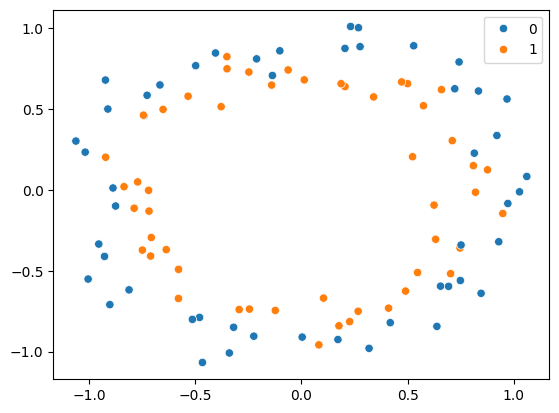

In [5]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=2)

In [7]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [9]:

# Fit the model
history = model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=3500, verbose=0)

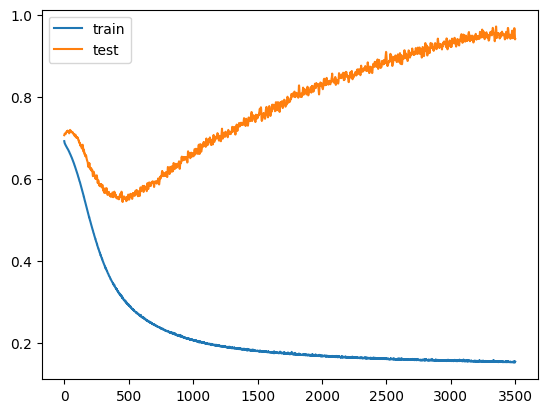

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 6s 629us/step


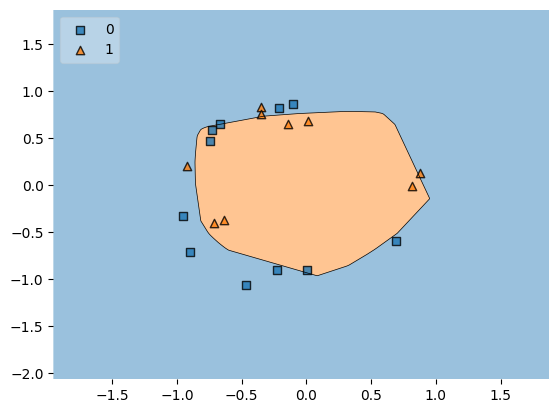

In [11]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

## Early Stopping
- Stop training when a monitored metric has stopped improving.

- Early stopping is a powerful technique for improving neural network performance. It acts as a dynamic stop condition, ensuring that training stops at the optimal point where the model performs best on validation data, preventing unnecessary computation and overfitting.

In [12]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [14]:
callback = EarlyStopping(
    monitor="val_loss",     # Metric to monitor
    min_delta=0.00001,      # Minimum change to qualify as an improvement
    patience=20,            # Number of epochs to wait before stopping
    verbose=1,              # Prints messages when stopping
    mode="auto",            # Direction of improvement (minimize or maximize)
    baseline=None,          # Minimum threshold for stopping
    restore_best_weights=False  # Whether to restore best model weights
)

In [15]:
history = model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=3500, verbose=1, callbacks=[callback])

Epoch 1/3500
3/3 [==============================] - 1s 63ms/step - loss: 0.6935 - accuracy: 0.4750 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/3500
3/3 [==============================] - 0s 10ms/step - loss: 0.6915 - accuracy: 0.5375 - val_loss: 0.6996 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 10ms/step - loss: 0.6897 - accuracy: 0.5125 - val_loss: 0.7009 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 10ms/step - loss: 0.6885 - accuracy: 0.5250 - val_loss: 0.7023 - val_accuracy: 0.3500
Epoch 5/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6873 - accuracy: 0.5375 - val_loss: 0.7026 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6865 - accuracy: 0.5250 - val_loss: 0.7041 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 10ms/step - loss: 0.6854 - accuracy: 0.5375 - val_loss: 0.7047 - val_accuracy: 0.4000
Epoch 8/3500


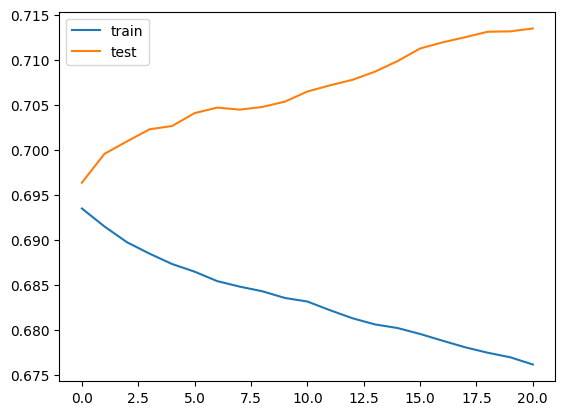

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 7s 673us/step


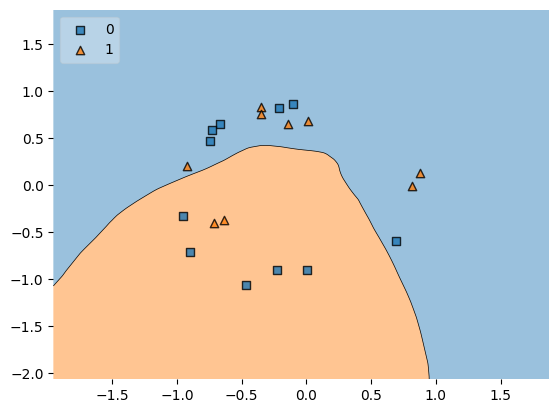

In [17]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()